## ASSIGNMENT MACHINE LEARNING                                 

### People's craze and liking towards automobiles have increased today. A wide variety of automobiles are releasing nowadays with amazing features.My client is a car production company based in India. They have approached me to build a pipeline to predict the number of people reviewing their next model, so that my client can use these prediction to either release the model or make some imporbvvements before launching it. As a data scientist I should build the model to predict the review count.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn.preprocessing

In [3]:
import sklearn.model_selection
import sklearn.tree
import sklearn.svm
import sklearn.neighbors
import sklearn.linear_model
import sklearn.model_selection

In [4]:
import sklearn.metrics

### visualization libraries

In [5]:
import seaborn as sns
sns.set(color_codes = True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
 

### loading datastet

In [6]:
df = pd.read_csv("../../datasets/CARS.csv")
df.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


checking data type of dataset

In [7]:
df.dtypes

car_name                object
reviews_count            int64
fuel_type               object
engine_displacement      int64
no_cylinder              int64
seating_capacity         int64
transmission_type       object
fuel_tank_capacity     float64
body_type               object
rating                 float64
starting_price           int64
ending_price             int64
max_torque_nm          float64
max_torque_rpm           int64
max_power_bhp          float64
max_power_rp             int64
dtype: object

### checking for null values

In [8]:
df.isnull().sum()

car_name               0
reviews_count          0
fuel_type              0
engine_displacement    0
no_cylinder            0
seating_capacity       0
transmission_type      0
fuel_tank_capacity     0
body_type              0
rating                 0
starting_price         0
ending_price           0
max_torque_nm          0
max_torque_rpm         0
max_power_bhp          0
max_power_rp           0
dtype: int64

After checking, since there is no null values, we are going for the visualization of dataset

### Visualization

plotting car name and starting price on bar plot.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


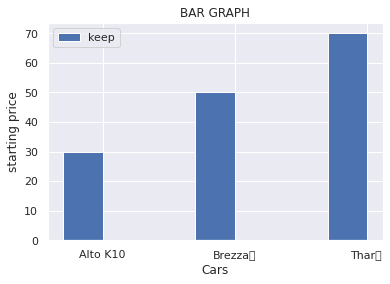

In [23]:
w = 0.3

x = ["Alto K10","Brezza	","Thar	"]
keep = [30,50,70]


bar1 = np.arange(len (x))
bar2 = [i+ w for i in bar1]

plt.bar(bar1,keep,w,label='keep')

       
plt.xlabel('Cars')
plt.ylabel('starting price')
plt.xticks(bar1+w/2,x)        
plt.title('BAR GRAPH')
plt.legend()



Thar has the highest starting price.

### Comparing starting and ending price

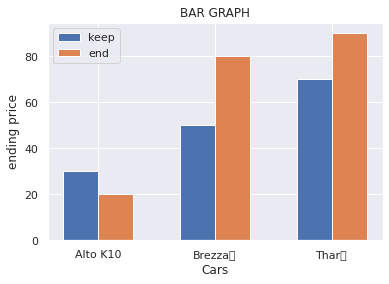

In [24]:
w = 0.3

x = ["Alto K10","Brezza	","Thar	"]
keep = [30,50,70]
end = [20,80,90]


bar1 = np.arange(len (x))
bar2 = [i+ w for i in bar1]

plt.bar(bar1,keep,w,label='keep')
plt.bar(bar2,end,w,label='end')
       
plt.xlabel('Cars')
plt.ylabel('ending price')
plt.xticks(bar1+w/2,x)        
plt.title('BAR GRAPH')
plt.legend()

comparing ending and starting price. Thar still has the highest ending and starting price. 

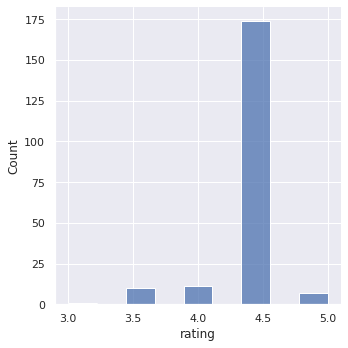

In [21]:
sns.displot(df["rating"])

rating 4.5 is the highest when checked.

plotting  reviews count and rating on pairplot.

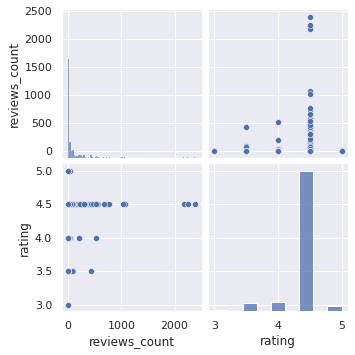

In [22]:
df = sns.pairplot(df[['car_name','reviews_count','rating']])

plotting rating and review counts.

next we are going to split our dataset into train and test sets

### Splitting dataset into train and test

In [9]:
df_train,df_test = sklearn.model_selection.train_test_split(df)

print("df_train size : ", df_train.shape) #size of train set
print("df_test size : ", df_test.shape) #size of test set

df_train size :  (152, 16)
df_test size :  (51, 16)


we are going to see if the values are intact or not

In [10]:
df_train["reviews_count"].value_counts()

1      14
2       9
3       9
5       7
6       6
       ..
137     1
30      1
99      1
257     1
69      1
Name: reviews_count, Length: 74, dtype: int64

Eventhoug we know, there are no null values, we will do data preprocessing and feature engineering anyway.

### Data preprocessing and Feature engineering

In [11]:
df_train = df_train.replace("?",pd.NaT)
df_train = df_train.dropna()

df_test = df_test.replace("?",pd.NaT)
df_test = df_test.dropna()

print("df_train size: ",df_train.shape)
print("df_test size: ",df_test.shape)



df_train size:  (152, 16)
df_test size:  (51, 16)


### Seperating target and feature vector

In [12]:
x_train = df_train.drop(["reviews_count"],axis = 1)
y_train = df_train["reviews_count"]

x_test = df_test.drop(["reviews_count"], axis = 1)
y_test = df_test["reviews_count"]

print("x_test size : ",x_test.shape) 
print("x_train size : ",x_train.shape)
print("y_train size : ",y_train.shape)
print("y_test size : ",y_test.shape)

x_test size :  (51, 15)
x_train size :  (152, 15)
y_train size :  (152,)
y_test size :  (51,)


now we have seperated target and feature vector and printed the sizes, we are going to encode our dataset 

### Encoding dataset

In [13]:
enc = sklearn.preprocessing.OneHotEncoder(handle_unknown = "ignore")
enc.fit(x_train)

x_train = enc.transform(x_train)
x_test = enc.transform(x_test)


print("x train : ",x_train.shape)
print("x test : ",x_test.shape)

x train :  (152, 845)
x test :  (51, 845)


next step is standardization

### Standardization

In [14]:
stand = sklearn.preprocessing.StandardScaler(with_mean = False)
stand.fit(x_train)

x_train = stand.transform(x_train)
x_test = stand.transform(x_test)

print("x train : ",x_train.shape)
print("x test : ",x_test.shape)

x train :  (152, 845)
x test :  (51, 845)


next we need to reduce our dimension

### dimensionality reduction

In [15]:
dim = sklearn.decomposition.PCA(n_components = 50)
dim.fit(x_train.toarray())

x_train = dim.transform(x_train.toarray())

x_test = dim.transform(x_test.toarray())

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)

x_train:  (152, 50)
x_test:  (51, 50)


when we compare the sizes, we can see that the dimension is reduced.

now we need to see which hyper parameter and algorithm we should use to build the model.

### Hyper parameter tuning and Algorithm selection

we will check svm, decision tree and linear regression to see which method and paramater we should use with grid search

## Decision Tree

In [16]:
para_grid1 = { 
   # "criterion" : ["gini", "entropy"],
    #"max_depth" : range(1,20,3),
   
    
}
model1 = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeRegressor(),
                                             para_grid1, scoring = "neg_mean_squared_error", cv = 5, n_jobs = None)
model1.fit(x_train,y_train)
print("mse of decision tree Regressor = {:.2f}".format(model1.best_score_))


mse of decision tree Regressor = -125445.48


we found the mean squared error and of decision tree. Next we check SVM

### SVM

In [17]:
para_grid2 = { 
    "kernel" : ["rbf", "poly"],
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10]
    
}
model2 = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(),
                                             para_grid2, scoring = "neg_mean_squared_error", cv = 5, n_jobs = None)
model2.fit(x_train,y_train)
print("mse of SVM Regressor = {:.2f}".format(model2.best_score_))
print("best paramters of SVM Regressor = {}".format(model2.best_params_))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


mse of SVM Regressor = -86504.28
best paramters of SVM Regressor = {'C': 10, 'kernel': 'poly'}


we found the mean squared error andn best parameters of SVM. Next we check KNN

### Linear Regression

In [18]:
para_grid4 = {
    "n_jobs" : range(1,10,2),
    "normalize" : ["True","False"]
}
model4 = sklearn.model_selection.GridSearchCV(sklearn.linear_model.LinearRegression(),
                                             para_grid4, scoring = "neg_mean_squared_error",)
model4.fit(x_train,y_train)
print("mse of Linear regrresion = {:.2f}".format(model4.best_score_))
print("best paramters of linear regression = {}".format(model4.best_params_))

mse of Linear regrresion = -221566.28
best paramters of linear regression = {'n_jobs': 1, 'normalize': 'True'}


we found the mean squared error and best parameters of Linear Regression. Next we test the best model.

### Testing the best model

In [19]:
y_predict = model2.predict(x_test)
MSE = sklearn.metrics.mean_squared_error(y_test,y_predict)
CM = sklearn.metrics.confusion_matrix(y_test,y_predict)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(y_test, y_predict)


print("MSE =", MSE)
print("Precision =", precision)
print("Recall =", recall)
print("F1-Score =", f1)
print("Confusion Matrix :\n", CM)

MSE = 162355.86274509804
Precision = [0.03921569 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Recall = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1-Score = [0.0754717 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.       ]
Confusion Matrix :
 [[2 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We have created the model. Now we can use this model to understand how many people will give reviews for the beta version next model, and use these reviews to conclude whethere the public liked the model or not. If not my client will release the model with more features so that it will be the most sold automobile in the coming year. This model can be used not only for automobiles but any other products.

### Classification report

In [20]:
sklearn.metrics.classification_report(y_test,y_predict)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.04      1.00      0.08         2\n           2       0.00      0.00      0.00         2\n           3       0.00      0.00      0.00         2\n           4       0.00      0.00      0.00         2\n           5       0.00      0.00      0.00         2\n           6       0.00      0.00      0.00         3\n           7       0.00      0.00      0.00         1\n           8       0.00      0.00      0.00         5\n           9       0.00      0.00      0.00         2\n          10       0.00      0.00      0.00         1\n          11       0.00      0.00      0.00         2\n          14       0.00      0.00      0.00         1\n          15       0.00      0.00      0.00         2\n          18       0.00      0.00      0.00         1\n          19       0.00      0.00      0.00         1\n          28       0.00      0.00      0.00         1\n          35       0.00      0.00      0.00         1\n       

### Reference

https://www.kaggle.com/datasets?page=2 -- Dataset